#SME0142 - Álgebra Linear e Aplicações
##Normas e ortogonalidade
####Docente: Cynthia de Oliveira Lage Ferreira
#### PAE - Luiz Otávio Toratti
ICMC - USP São Carlos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

###**Exemplos de normas do $\mathbb{R}^n$**

- $$\|\mathbf{x}\|_2 = \bigg( \sum_{i=1}^n |x_i|^2 \bigg)^{1/2}, \qquad
\|\mathbf{x}\|_\infty = \max \limits _{1 \leq i \leq n} | x_{i} |, \qquad
\|\mathbf{x}\|_1 = \sum _{i=1} ^n | x_{i} |$$

- $\|\mathbf{x}\|_p = \bigg( \sum_{i=1}^n |x_i|^p \bigg)^{1/p}, \; p \geq 1$

- Esfera com centro na origem e raio unitário.
$$S = \{\mathbf{x} \in \mathbb{R}^n; \; \|\mathbf{x}\|=1\}$$


###**Em $\mathbb{R}^2$**

-  $S = \{\mathbf{x} \in \mathbb{R}^2; \; \|\mathbf{x}\|_2=1\} = \{(x,y) \in \mathbb{R}^2; \; x^2 + y^2 = 1\}$
---
-  $S = \{\mathbf{x} \in \mathbb{R}^2; \; \|\mathbf{x}\|_\infty=1\} = \{(x,y) \in \mathbb{R}^2; \; \max\{|x|,|y|\}=1 \}$ \\
$\Rightarrow 
\begin{cases}
x = \pm 1 \Rightarrow -1 \leq y \leq 1 \\
y = \pm 1 \Rightarrow -1 \leq x \leq 1 \\
\end{cases}
$
---
-  $S = \{\mathbf{x} \in \mathbb{R}^2; \; \|\mathbf{x}\|_1=1\} = \{(x,y) \in \mathbb{R}^2; \; |x|+|y|=1 \}$ \\
$\Rightarrow 
\begin{cases}
x + y = 1, \text{ se }  (x,y) \in [0,1]\times[0,1]  \\
-x + y = 1, \text{ se }  (x,y) \in [-1,0]\times[0,1] \\
-x - y = 1, \text{ se }  (x,y) \in [-1,0]\times[-1,0]\\
x - y = 1, \text{ se }  (x,y) \in [0,1]\times[-1,0]
\end{cases}
$

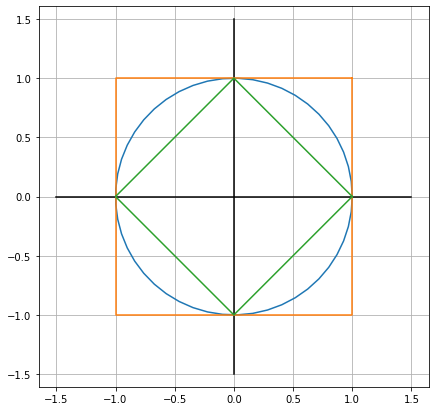

In [ ]:
# Plot
plt.rcParams["figure.figsize"] = (7,7)
plt.plot([-1.5, 1.5], [0, 0], 'k-') # eixo x
plt.plot([0, 0], [-1.5, 1.5], 'k-') # eixo y
plt.axis('equal')
plt.grid('True')

# p=2
t = np.linspace(0, 2*np.pi, 50)
plt.plot(np.cos(t), np.sin(t))

# p=inf
plt.plot([1, -1, -1, 1, 1], [1, 1, -1, -1, 1])

# p=1
plt.plot([1, 0, -1, 0, 1], [0, 1, 0, -1, 0])

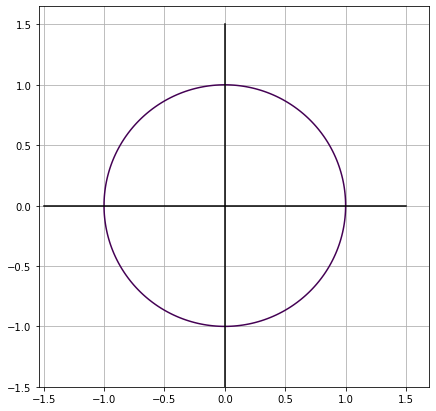

In [ ]:
delta = 0.025
xrange = np.arange(-1.5, 1.5, delta)
yrange = np.arange(-1.5, 1.5, delta)
X, Y = np.meshgrid(xrange, yrange)

#  Pij = (X[i,j], Y[i,j])

# norma p
p = 3

Z = np.zeros(X.shape)
for i in range(Z.shape[0]):
  for j in range(Z.shape[1]):
    #Z[i,j] = np.sqrt(X[i,j]**2 + Y[i,j]**2)
    #Z[i,j] = max(np.abs(X[i,j]), np.abs(Y[i,j]))
    #Z[i,j] = np.abs(X[i,j]) + np.abs(Y[i,j])
    Z[i,j] = np.linalg.norm(np.array([X[i,j],Y[i,j]]), p)

# Plot
plt.rcParams["figure.figsize"] = (7,7)
plt.plot([-1.5, 1.5], [0, 0], 'k-') # eixo x
plt.plot([0, 0], [-1.5, 1.5], 'k-') # eixo y
plt.axis('equal')
plt.contour(X, Y, Z, [1])
plt.grid('True')

#Z = (X**2 + Y**2 - 1)**3 - X**2 * Y**3
#plt.contour(X, Y, Z, [0])

###Curvas de nível: $f(x,y) = c$

In [ ]:
import plotly.graph_objects as go

delta = 0.025
xrange = np.arange(-1.5, 1.5, delta)
yrange = np.arange(-1.5, 1.5, delta)
X, Y = np.meshgrid(xrange, yrange)

fig = go.Figure()
fig.add_trace(go.Surface(x=X, y=Y, z=Z, opacity=0.5, showscale=False, name='Autoespaço'))

fig.update_layout(scene_aspectmode='cube', autosize=False, width=500, height=500, 
                  margin=dict(l=20, r=20, b=20, t=20, pad=4 ), 
                  paper_bgcolor="LightSteelBlue")

fig.show()

###**Exemplo**

Mostre que $\{\mathbf{u}_1, \mathbf{u}_2, \mathbf{u}_3\}$ é um conjunto ortogonal, onde

$$
\mathbf{u}_1 = 
\begin{bmatrix}
3 \\
1 \\
1
\end{bmatrix}, \quad
\mathbf{u}_2 = 
\begin{bmatrix}
-1 \\
2 \\
1
\end{bmatrix}, \quad
\mathbf{u}_3 = 
\begin{bmatrix}
-1/2 \\
-2 \\
7/2
\end{bmatrix}.
$$

In [ ]:
# Solução

u1 = np.array([3, 1, 1])
u2 = np.array([-1, 2, 1])
u3 = np.array([-1/2, -2, 7/2])

print('<u1, u2> = ', np.dot(u1,u2))
print('<u1, u3> = ', np.dot(u1,u3))
print('<u2, u3> = ', np.dot(u2,u3))

'''
u1 = np.array([3, 1, 1]).reshape((3,1))
u2 = np.array([-1, 2, 1]).reshape((3,1))
u3 = np.array([-1/2, -2, 7/2]).reshape((3,1))

print('<u1, u2> = ', u1.T @ u2)
print('<u1, u3> = ', u1.T @ u3)
print('<u2, u3> = ', u2.T @ u3)
'''

<u1, u2> =  0
<u1, u3> =  0.0
<u2, u3> =  0.0


"\nu1 = np.array([3, 1, 1]).reshape((3,1))\nu2 = np.array([-1, 2, 1]).reshape((3,1))\nu3 = np.array([-1/2, -2, 7/2]).reshape((3,1))\n\nprint('<u1, u2> = ', u1.T @ u2)\nprint('<u1, u3> = ', u1.T @ u3)\nprint('<u2, u3> = ', u2.T @ u3)\n"

**OBS:** Sejam $\mathbf{x},\mathbf{y} \in \mathbb{R}^n$
$$
\mathbf{x}=\begin{bmatrix}
x_1 \\ \vdots \\ x_n
\end{bmatrix},\;
\mathbf{y}=\begin{bmatrix}
y_1 \\ \vdots \\ y_n
\end{bmatrix}
$$

* Produto escalar usual (notação matricial)
\begin{eqnarray}
<\mathbf{x},\mathbf{y}> &=& x_1y_1+x_2y_2+\cdots+x_ny_n \\
&=& [x_1 \quad x_2 \quad \cdots \quad x_n]\begin{bmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n 
\end{bmatrix} \\
&=& \mathbf{x}^T\mathbf{y}
\end{eqnarray}

###**Exemplo**

O conjunto $S = \{\mathbf{u}_1, \mathbf{u}_2, \mathbf{u}_3\}$ do exemplo anterior é uma base ortogonal para $\mathbb{R}^3$. Determine as coordenadas do vetor $\mathbf{v}=[6,1,-8]^T$ na base $S$.

In [ ]:
# Solução
v = np.array([6,1,-8])

# v = c1*u1 + c2*u2 + c3*u3

c1 = np.dot(v, u1) / np.dot(u1, u1)
c2 = np.dot(v, u2) / np.dot(u2, u2)
c3 = np.dot(v, u3) / np.dot(u3, u3)

print('Coordenadas de v na base S: ', [c1, c2, c3])

print(c1*u1 + c2*u2 + c3*u3)


Coordenadas de v na base S:  [1.0, -2.0, -2.0]
[ 6.  1. -8.]


**OBS:** Note como é fácil calcular as coordenadas de um vetor numa base ortogonal. Se a base não fosse ortogonal, teríamos que resolver um sistema linear.

###**Exemplo**

Construa um par $u$, $v$ de vetores aleatórios em $\mathbb{R}^4$, e seja
$$ A = 
\begin{bmatrix} 
0.5 & 0.5 & 0.5 & 0.5 \\ 
0.5 & 0.5 & -0.5 & -0.5 \\
0.5 & -0.5 & 0.5 & -0.5 \\
0.5 & -0.5 & -0.5 & 0.5
\end{bmatrix}
$$

* Indique as colunas de $A$ por $a_1$, $a_2$, $a_3$ e $a_4$. Calcule $<a_1,a_2>$, $<a_1,a_3>$, $<a_1,a_4>$, $<a_2,a_3>$, $<a_2,a_4>$, $<a_3,a_4>$ e o comprimento (norma) e cada coluna;

* Calcule e compare os comprimentos de $u$, $Au$, $v$ e $Av$.

* Calcule e compare o cosseno do ângulo entre $u$ e $v$ e entre $Au$ e $Av$.

* Repita os dois itens anteriores para outros pares de vetores aleatórios. O que podemos conjecturar sobre o efeito de $A$ nos vetores?


In [ ]:
# Solução
A = np.array([[0.5,  0.5,  0.5,  0.5], 
              [0.5,  0.5, -0.5, -0.5], 
              [0.5, -0.5,  0.5, -0.5],
              [0.5, -0.5, -0.5,  0.5]])

u = np.random.uniform(0, 1, (4,1))
v = np.random.uniform(0, 1, (4,1))

print(A.T @ A)

Au = A @ u
Av = A @ v
nu = np.linalg.norm(u)
nv = np.linalg.norm(v)
nAu = np.linalg.norm(Au)
nAv = np.linalg.norm(Av)

print(nu, nAu)
print(nv, nAv)

cos_uv = np.dot(u.T, v) / (nu * nv)
cos_AuAv = np.dot(Au.T, Av) / (nAu * nAv)

print(cos_uv, cos_AuAv)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
1.1754086519589877 1.1754086519589877
1.3219275582903032 1.3219275582903034
[[0.93075874]] [[0.93075874]]


### Matriz Ortonormal (Ortogonal)
Seja $\mathbf{Q}$ uma matriz quadrada cujas colunas são ortonormais, então 

\begin{eqnarray}
\mathbf{Q}^\top\mathbf{Q} 
&=& \begin{bmatrix}
-\!- & \mathbf{q}^\top_1 & -\!-\\
& \vdots &\\
-\!- & \mathbf{q}^\top_n & -\!-
\end{bmatrix}
\begin{bmatrix}
| &  & |\\
\mathbf{q}_1  & \cdots & \mathbf{q}_n\\
| &  & |
\end{bmatrix} \\
&=& 
\begin{bmatrix}
\mathbf{q}^\top_1\mathbf{q}_1 & \mathbf{q}^\top_1\mathbf{q}_2 & \cdots & \mathbf{q}^\top_1\mathbf{q}_n \\
\mathbf{q}^\top_2\mathbf{q}_1 & \mathbf{q}^\top_2\mathbf{q}_2 & \cdots & \mathbf{q}^\top_2\mathbf{q}_n \\
  &   & \vdots & \\
\mathbf{q}^\top_n\mathbf{q}_1 & \mathbf{q}^\top_n\mathbf{q}_2 & \cdots & \mathbf{q}^\top_n\mathbf{q}_n
\end{bmatrix}
=
\begin{bmatrix}
1 & 0 & \cdots & 0\\
0 & 1 & \cdots & 0\\
  &   & \vdots & \\
0 & 0 & \cdots & 1\\
\end{bmatrix}
\end{eqnarray}

- $\mathbf{Q}^\top\mathbf{Q} = \mathbf{Q}\mathbf{Q}^\top = \mathbf{I}$

- $\mathbf{Q}^{-1}=\mathbf{Q}^\top$

- Preserva norma

$
\begin{eqnarray}
\|\mathbf{Q}\mathbf{x}\|^2 &=& (\mathbf{Q}\mathbf{x})^\top(\mathbf{Q}\mathbf{x}) \\ 
&=& \mathbf{x}^\top\mathbf{Q}^\top\mathbf{Q}\mathbf{x} \\ 
&=& \mathbf{x}^\top\mathbf{x} \\ 
&=& \|\mathbf{x}\|^2 \\
\Rightarrow \|\mathbf{Q}\mathbf{x}\| &=& \|\mathbf{x}\|
\end{eqnarray}
$

- Preserva ângulo

$
\begin{eqnarray}
cos(\mathbf{Qx},\mathbf{Qy}) &=& \frac{(\mathbf{Qx})^\top (\mathbf{Qy})}{\|\mathbf{Qx}\| \|\mathbf{Qy}\|} \\
&=& \frac{\mathbf{x}^\top \mathbf{Q}^\top \mathbf{Qy}}{\|\mathbf{x}\| \|\mathbf{y}\|} \\
&=& \frac{\mathbf{x}^\top \mathbf{y}}{\|\mathbf{x}\| \|\mathbf{y}\|} \\
\end{eqnarray}
$
